# **Research of advertisements for the sale of apartments**


#### **Project Description** <br>
An archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to **determine the market value of real estate**. 

### **Table of Contents** :
+ [1. Data general information](#1.0)
+ [2. Data preprocessing](#preprocessing)
    - [2.1. Identification  and Dealing with  missing values](#2.1)
    - [2.2. Data Type Casting](#2.2)
+ [3. Adding new columns to table](#3.0)
    - [3.1. Price per $m^2$](#3.1)
    - [3.2  Publication day of the week, month and year](#3.2)
    - [3.3. Floor of the apartment(first, last, other)](#3.3)
    - [3.4. Real estate ratio](#3.2)
+ [4.Exploratory data analysis](#4.0)
    - [4.1. Histograms](#4.1)
    - [4.2. Study the time of sale of the apartment.](#4.2)
    - [4.3. Factors  affect the value of a real esate.](#4.3)
    - [4.4. Most  added location](#4.4)
    - [4.5 'St Petersbourg'  case](#4.5)
+ [5. Conclusion](#5.0)

## **1. Data general information**<a name="1.0"> </a>

In [575]:
!install tabulate

usage: install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 file2
       install [-bCcpSsv] [-B suffix] [-f flags] [-g group] [-m mode]
               [-o owner] file1 ... fileN directory
       install -d [-v] [-g group] [-m mode] [-o owner] directory ...


In [576]:
import pandas as pd
import numpy as np
from tabulate import tabulate
import math 
from  ydata_profiling import ProfileReport
from matplotlib import pyplot as plt 
import seaborn as sns
from  pylab import rcParams 
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 10,6
%config InlineBackend.figure_format = 'svg'

import warnings 
warnings.simplefilter('ignore')

In [577]:
estate = pd.read_csv('real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns',500)
estate.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


- *balcony* — number of balconies
- *airports_nearest* - distance to the nearest airport in meters (m)
- *ceiling_height* - ceiling height (m)
- *cityCenters_nearest* - distance to the city center (m)
- *days_exposition* - how many days the real estate was placed (from publication to withdrawal)
- *first_day_exposition* - publication date
- *floor* - floor
- *floors_total* - total floors in the house
- *is_apartment* - apartments (boolean)
- *kitchen_area* - kitchen area in square meters (m²)
- *last_price* - price at the time of unpublishing
- *living_area* - living area in square meters (m²)
- *locality_name* — name of the locality
- *open_plan* - open plan (boolean)
- *parks_around3000* - number of parks within a 3 km radius
- *parks_nearest* - distance to the nearest park (m)
- *ponds_around3000* - the number of ponds within a radius of 3 km
- *ponds_nearest* — distance to the nearest body of water (m)
- *rooms* - number of rooms
- *studio* - studio apartment (boolean)
- *total_area* - area of the apartment in square meters (m²)
- *total_images* - the number of photos of the apartment in the ad

In [578]:
# ProfileReport(estate)

In [579]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [580]:
estate.describe().loc[['min','max','mean','count']]

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.0000,1.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.0000,1580.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.9809,180.888634
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.0000,20518.000000


#### **Interpretation**
The file contain **23699 entries**  grouped in **21 feature**. <br>
features( **17** quantitatives data ,**3** booleans, **1** categorical )   <br>

## **2. Data preprocessing** <a name = "2.0"> </a>
### &nbsp; &nbsp; **2.1. Identification  and  and dealing with  missing  missing values** <a name = "2.1"> </a>
**Variables containing missing value**
-  *ceiling_height*  
-  *floors_total*
-  *living_area*
-  *is_apartment*
-  *kitchen_area*
-  *balcony*
-  *locality_name*
-  *airports_nearest*
-  *cityCenters_nearest*
-  *parks_around3000*
-  *parks_nearest*
-  *ponds_around3000*
-  *ponds_nearest*
-  *days_exposition*


[1] ***ceiling_height***

In [581]:
estate.query('ceiling_height.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,False,False,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,False,False,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,6,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9.0,20.0,6,NaN,False,False,11.0,2.0,Санкт-Петербург,40837.0,16704.0,0.0,NaN,0.0,NaN,38.0
23690,3,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.0,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.0,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.5,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0


**hypothesis:** <span style='color:#1e4fba'> It  seem that the publisher don't known the height  of the ceiling since it is not a  common info that people are looking for when buying the house . </span>

[2] ***floors_total***

In [582]:
estate.query('floors_total.isnull()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


 We check the relationship between  *floors_total feature* and *is_apartment feature*.

In [583]:
estate.query('floors_total.isnull() and is_apartment == "True"')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [584]:
estate.query('floors_total.isnull() and is_apartment.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,False,False,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,False,False,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,False,False,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,NaN,False,False,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


**hypothesis:** <span style='color:#1e4fba'> It is possible that the real estate is not a appartement .It is better known the  various types of real state  to handle the problem in a better way. Thus we can maybe  fill the NaN by *0* since the real estate has no floor .</span> <br>

<img src="realEstate.png" style="width:1200px;height:700px;">

In [585]:
# replace floors_total feature by 0
estate['floors_total'] = estate['floors_total'].fillna(0)

[3] ***Living Area***

In [586]:
estate.query('living_area.isnull()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [587]:
estate.query('living_area.isnull() and  (is_apartment.isnull() or is_apartment == False)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,NaN,False,False,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,False,False,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,False,False,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


**hypothesis:** <span style='color:#1e4fba'> If  a data miss in *living_area* , then It miss also in *is_apartment* feature . Likely , the  real estate is not  'appartement'. We can try to compare the price when is apartment  and  when is not .</span> <br>

In [588]:
# maxi price when it is not a appartement
estate.query('(is_apartment.isnull() or is_apartment == False)')['last_price'].max()

763000000.0

In [589]:
# min price when it is not a appartement
estate.query('~(is_apartment.isnull() or is_apartment == False)')['last_price'].min()

2150000.0

*Living Area* are missing because it is not a appartement.
However we can fill them by the mean for better calculation.

In [590]:
# def livingArea(row):
#     living = row['living_area']
#     if(math.isnan(row['living_area'])):
#         return estate['living_area'].mean()
#     else :
#         return living

In [591]:
estate['living_area'].replace(to_replace = np.NaN , value = round(estate['living_area'].mean(),2),inplace = True)
# estate['living_area'] = estate.apply(livingArea, axis=1)

[4] ***is_apartement*** <br>
**hypothesis:** <span style='color:#1e4fba'>  According the previous steps , we let them empty for now .</span> <br>

[5] ***kitchen_area*** <br>
**hypothesis:** <br> we can considere that  *kitchen_area = total_area - kitchen_area* .


In [592]:
estate['kitchen_area'].fillna(value=estate['total_area'] - estate['living_area'], inplace=True)
estate['kitchen_area']

0         25.00
1         11.00
2          8.30
3        124.54
4         41.00
          ...  
23694     13.83
23695      8.50
23696     27.00
23697     23.30
23698      9.00
Name: kitchen_area, Length: 23699, dtype: float64

[6] ***balcony*** <br>

In [593]:
estate['balcony'] = estate['balcony'].fillna(0)

**hypothesis:** <span style='color:#1e4fba'> The missing  value can be replaced by *0* .</span> <br>

[7] ***locality_name***

In [594]:
estate['locality_name']

0            Санкт-Петербург
1             посёлок Шушары
2            Санкт-Петербург
3            Санкт-Петербург
4            Санкт-Петербург
                ...         
23694        Санкт-Петербург
23695                  Тосно
23696       село Рождествено
23697        Санкт-Петербург
23698    поселок Новый Учхоз
Name: locality_name, Length: 23699, dtype: object

In [595]:
estate.query('locality_name.isnull()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,False,False,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,False,False,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,False,False,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,False,False,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,False,False,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [596]:
estate.query('locality_name.isnull()')['cityCenters_nearest'].mean()

11278.90243902439

In [597]:
estate.pivot_table(index='locality_name',values=['airports_nearest','cityCenters_nearest']).sort_values(by='cityCenters_nearest').head()

,airports_nearest,cityCenters_nearest
locality_name,,
Санкт-Петербург,28046.186237,11601.291571
посёлок Парголово,53994.926606,19924.776758
поселок Мурино,51553.000000,21888.000000
посёлок Стрельна,28148.363636,23376.113636
посёлок Шушары,16061.458716,24243.387615


**hypothesis:** <span style='color:#1e4fba'> We assume that the publisher don't know the locality name or it is obvious locality. We can change by the likehood locality name . </span> <br>
*Санкт-Петербург*  is a good replacement according the code  above.

In [598]:
estate['locality_name'].fillna(value = 'Санкт-Петербург', inplace=True)

[8] ***airports_nearest*** <br>
[9] ***cityCenters_neares*** <br>
[10] ***parks_around3000*** <br>
[11] ***parks_nearest*** <br>
[12] ***ponds_nearest***<br>
[13] ***ponds_around3000***<br>

**hypothesis:** <span style='color:#1e4fba'> We assume that the publisher don't know these informations or 0 in the place of Nan. We let the value blank for now.</span> <br>

[14] ***days_exposition***<br>
for unkown reason , the leave this feature blank . No suggered replacement can be suggest for now . 

(later ->  It is possible to replace by the median)


In [599]:
estate['days_exposition']

0          NaN
1         81.0
2        558.0
3        424.0
4        121.0
         ...  
23694      NaN
23695     45.0
23696      NaN
23697    602.0
23698      NaN
Name: days_exposition, Length: 23699, dtype: float64

### &nbsp;&nbsp; **2.2 Data Type Casting** <a name = "2.2"> </a>

In [600]:
estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,34.46,9,NaN,False,False,124.54,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [601]:
estate['first_day_exposition'] = pd.to_datetime(estate['first_day_exposition'])
estate['is_apartment'] =  estate['is_apartment'].astype(bool)
estate['floors_total'] =  estate['floors_total'].astype(int)
estate['days_exposition'] = pd.to_numeric(estate['days_exposition'], errors='coerce', downcast='float').astype('Int64')
estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

We changed data type  of *first_day_exposition* feature to datetime64[ns]. (date object and better visualisation.<br>
We changed  data type of  *is_apartment'*  feature to bool type.


## **3. Adding new columns to table:** <a name = "3.0"> </a>

### &nbsp;&nbsp;**3.1. Price per $m^2$** <a name = "3.1"> </a>

In [602]:
estate['price_meter_2'] =  round(estate['last_price'] / estate['total_area'], 2)

### &nbsp;&nbsp;**3.2. Publication day of the week, month and year** <a name = "3.2"> </a>

In [603]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.weekday.html
estate['pub_day'] = estate['first_day_exposition'].dt.weekday
estate['pub_month'] = estate['first_day_exposition'].dt.month
estate['pub_year'] = estate['first_day_exposition'].dt.year

In [604]:
estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter_2,pub_day,pub_month,pub_year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,34.46,9,True,False,False,124.54,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,True,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,<NA>,72490.85,1,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,True,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45,52542.37,0,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,True,False,False,27.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,44091.71,6,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,34.46,12,True,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,149511.40,1,3,2017


### &nbsp;&nbsp;**3.3. Floor of the apartment(first, last, other)** <a name = "3.3"> </a>

In [605]:
def floor_variant(row):
    if(row['floor'] == 1 ):
        return 'первый'
    elif(row['floor'] == row['floors_total']):
        return 'последний'
    else :
        return 'другой'

In [606]:
estate['floor_position'] =  estate.apply(floor_variant, axis=1)

### &nbsp;&nbsp; **3.4.Real estate ratio** <a name = "3.4"> </a>

In [607]:
estate['ratio_living_space'] =  round(estate['living_area'] / estate['total_area'] * 100, 2)
estate['ratio_kitchen_space']=   round(estate['kitchen_area'] / estate['total_area'] * 100, 2)

In [608]:
estate['ratio_kitchen_space']

0        23.15
1        27.23
2        14.82
3        78.33
4        41.00
         ...  
23694    10.34
23695    14.41
23696    47.62
23697    30.36
23698    27.86
Name: ratio_kitchen_space, Length: 23699, dtype: float64

## **4.Exploratory data analysis** <a name = "4.0"> </a>

### **4.1 Histograms** <a name = "4.1"> </a>

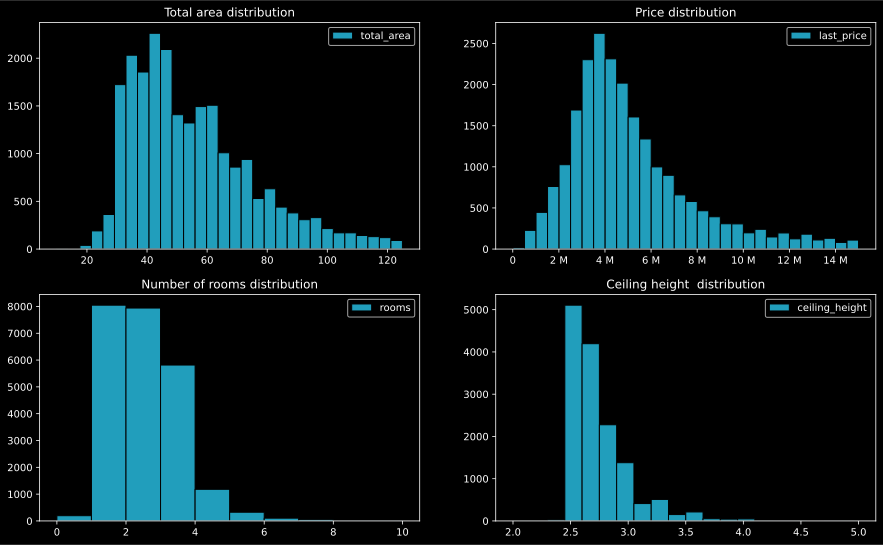

In [609]:
plt.style.use('dark_background')
fig , axes = plt.subplots(ncols=2,nrows=2,figsize = (15,9))
estate['total_area'].hist(bins = 30 ,range=(10,125),ax = axes[0,0],color='#219ebc',grid=False,ec="black",legend="total_area")
axes[0,0].set_title("Total area distribution")
estate['last_price'].hist(bins = 30 ,ax = axes[0,1],range=(10000,15000000),color='#219ebc',grid=False,ec="black",legend="last_price")
axes[0,1].set_title("Price distribution")
axes[0,1].xaxis.set_major_formatter(ticker.EngFormatter())
estate['rooms'].hist(bins = 10, range=(0,10), ax = axes[1,0],color='#219ebc',grid=False,ec="black",legend="rooms")
axes[1,0].set_title("Number of rooms distribution")
estate['ceiling_height'].hist(bins = 20 , ax = axes[1,1], range=(2,5),color='#219ebc',grid=False,ec="black",legend="ceiling_height")
axes[1,1].set_title("Ceiling height  distribution")
plt.show()

#### **Interpretation according the  histogram**<br>


    1. Most of appartment have  area  between 25 and 80 $m^2$<br>
    2. Appart price turn around 2 Millions to 8 Millions. <br>
    3. Appartement have in general  1,2,3 or 4 rooms . Some rooms have more but they are marginal. <br>
    4. the meter of ceiling height is comprised between 2.5m and 3m . <br>
   

### **4.2 Study the time of sale of the apartment.** <a name = "4.2"> </a>

In [610]:
estate['days_exposition'].describe()['mean']

180.88863436982163

In [611]:
estate['days_exposition'].median()

95.0

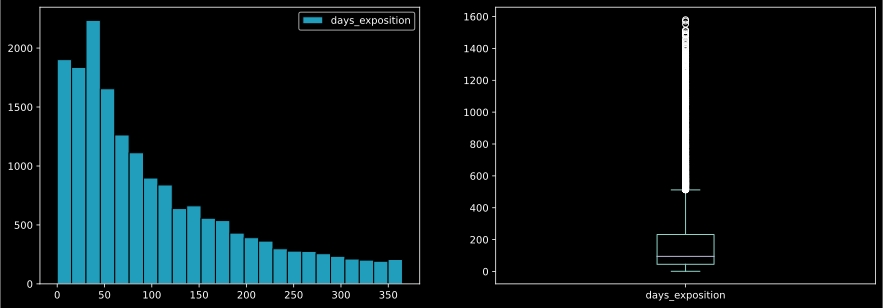

In [612]:
plt.style.use('dark_background')
fig , axs = plt.subplots(1,2,figsize = (15,5))
estate['days_exposition'].hist(bins = 24 , range = (0,365), color='#219ebc', ax=axs[0],grid=False,ec="black",legend=True,figsize=(15,5))
estate['days_exposition'].plot(kind='box',ax=axs[1])
plt.show()

### **Interpretation**

1. Since the data is skewed to the right, the mean  is influenced by the outlier .
The median here describe the measure of central tendency.<br>
A real Estate take in general ***95 days ( 3 months)*** to be sell .

Limit our histogram in theses 95 days  and see what happen .

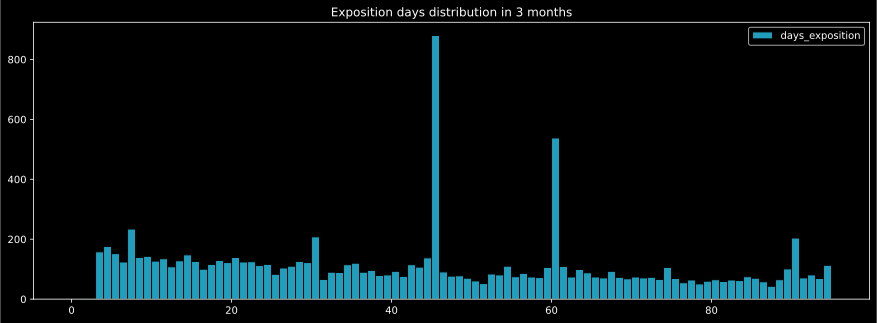

In [613]:
plt.style.use('dark_background')
estate['days_exposition'].hist(bins =  95 ,range = (0,95) ,color='#219ebc',grid=False,ec="black",legend=True,figsize=(15,5))
plt.title("Exposition days distribution in 3 months")
plt.show()

2. Peek are seen in 45 th and 60th days . Sincere most of user don't delete publication themselve ,  the service may make a survey to ask the publisher if the real estate is already the 45 th days :
* If already seel , they delete it . <br>
* if no , the real estate can  stay in the service.
* if no answer ,  they  relanch a verification the 60 th days  and delete if no answer again.<br>
These  assumption maybe be confirm by readoing the service policies or by asking  to collegue .

We delete  45 and 60 in our data set to more accurate analysis. <br>

In [614]:
estate['days_exposition'].value_counts().sort_values(ascending=False)

45      880
60      538
7       234
30      208
90      204
       ... 
1146      1
1278      1
1206      1
1125      1
971       1
Name: days_exposition, Length: 1141, dtype: Int64

In [615]:
estate['days_exposition'].replace([45.0,60],np.nan, inplace=True)

In [616]:
estate['days_exposition'].value_counts().sort_values(ascending=False)

7       234
30      208
90      204
4       176
3       158
       ... 
1396      1
748       1
1146      1
1278      1
971       1
Name: days_exposition, Length: 1139, dtype: Int64

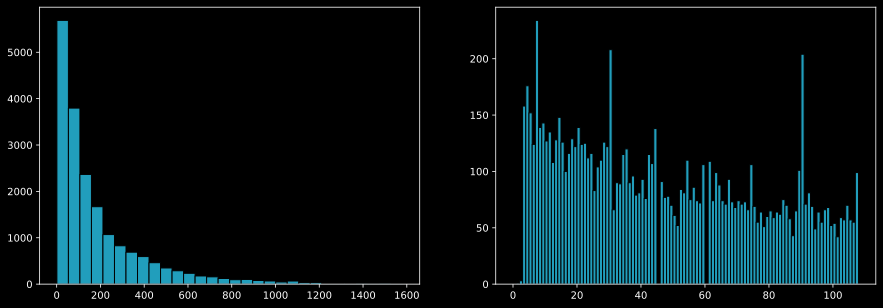

In [617]:
plt.style.use('dark_background')
fig , axs = plt.subplots(1,2,figsize = (15,5))
estate['days_exposition'].hist(bins = 30 ,ax=axs[0],color='#219ebc',grid=False,ec="black")
estate['days_exposition'].hist(bins = 108 ,ax=axs[1],range = (0,108) , color='#219ebc',grid=False,ec="black")
plt.show()

In [618]:
estate['days_exposition'].median()

108.0

The median  has moved from 95 days to 108 days.<br>
We conclude that a real esate can take about ***3,5 months (108 days)*** to be sell form the site.

In [619]:
estate['days_exposition'].describe()

count       19100.0
mean     190.554607
std      224.742146
min             1.0
25%            42.0
50%           108.0
75%           249.0
max          1580.0
Name: days_exposition, dtype: Float64

we considere that the real estate is sold very quicly in one ***42 days***  and anormally long more than ***250 days***.

### **4.3 Factors  affect the value of a real esate.** <a name = "4.3"> </a>

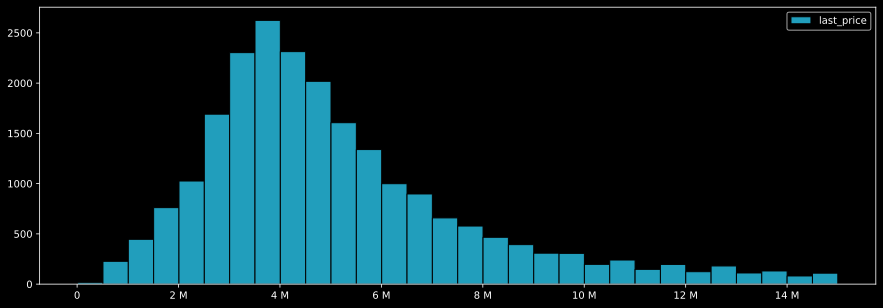

In [620]:
fig , axes = plt.subplots(figsize = (15,5))
estate['last_price'].hist(bins = 30, range=(10000,15000000),color='#219ebc',grid=False,ec="black",legend="last_price")
axes.xaxis.set_major_formatter(ticker.EngFormatter())

In [621]:
estate['floor_position'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_position, dtype: int64

<AxesSubplot:>

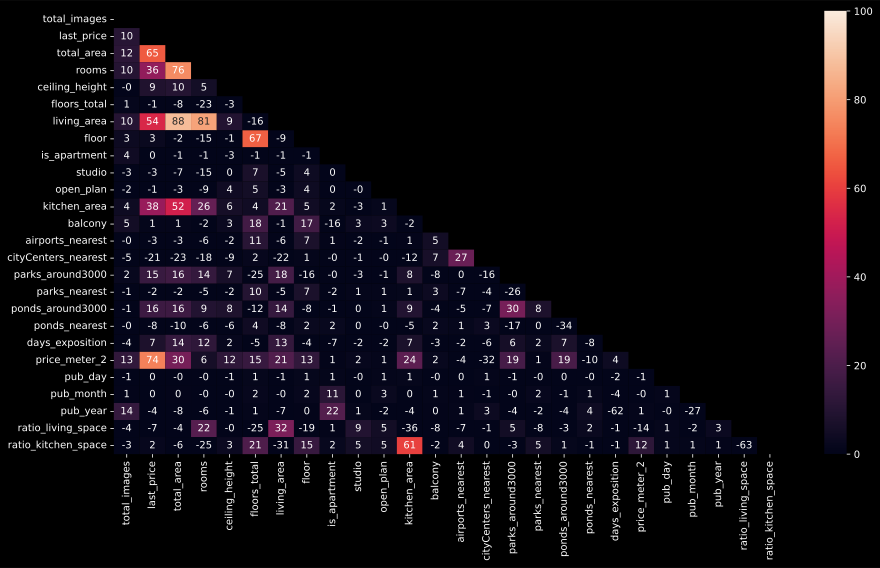

In [622]:
# https://www.python-graph-gallery.com/90-heatmaps-with-various-input-format
mask =  np.zeros_like(estate.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,8))
sns.heatmap(estate.corr() * 100 , mask=mask, vmin = 0, vmax = 100 , annot=True,fmt= '.0f')

In [623]:
estate.corr()[['last_price']]

,last_price
total_images,0.104473
last_price,1.000000
total_area,0.653675
rooms,0.363343
ceiling_height,0.085430
floors_total,-0.007094
living_area,0.542261
floor,0.026576
is_apartment,0.000640
studio,-0.025362


<AxesSubplot:>

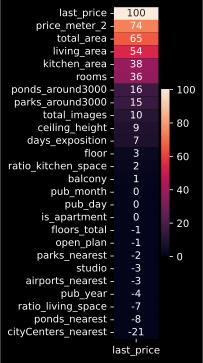

In [624]:
# https://www.python-graph-gallery.com/90-heatmaps-with-various-input-format
mask =  np.zeros_like(estate.corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(1,6))
sns.heatmap(estate.corr()[['last_price']].sort_values(by='last_price',ascending=False) * 100,vmin = 0, vmax = 100 , annot=True,fmt= '.0f')

### **Interpretation**
the **high price** is not only more influenced by the **area** of the real estate (living area  , kitchen area)  but the  number of rooms .<br>
**Parks** and **Pounds** around have a light effect on the price . 
Also, the price decrease when we moving away from the **city center**.<br>

In [625]:
# estate['floor'].value_counts().sort_values(ascending=False).count()

In [626]:
grouped_first_floor =  estate[estate['floor_position'] == 'первый'][['total_area','last_price','rooms']]
# grouped_first_floor['last_price'].describe().median()
grouped_first_floor.columns = [ 'total_area_first_floor',
                                'last_price_first_floor',
                                'room_first_floor'
                                ]
print(grouped_first_floor.describe())

       total_area_first_floor  last_price_first_floor  room_first_floor
count             2917.000000            2.917000e+03       2917.000000
mean                56.306034            4.803560e+06          2.146040
std                 28.796393            5.098889e+06          1.028701
min                 13.000000            4.300000e+05          0.000000
25%                 41.000000            2.800000e+06          1.000000
50%                 51.000000            3.900000e+06          2.000000
75%                 65.000000            5.400000e+06          3.000000
max                460.800000            1.350000e+08          9.000000


In [627]:
# fig , axes = plt.subplots(figsize = (15,5))
# grouped_first_floor['last_price'].hist(bins = 70,range= (0,20000000),color='#219ebc',grid=False,ec="black",legend="last_price")
# axes.xaxis.set_major_formatter(ticker.EngFormatter())

In [628]:
grouped_last_floor =  estate[estate['floor_position'] == 'последний'][['total_area','last_price','rooms']]
grouped_last_floor.columns = [ 'total_area_last_floor',
                                'last_price_last_floor',
                                'room_last_floor'
                                ]
grouped_last_floor

,total_area_last_floor,last_price_last_floor,room_last_floor
12,54.0,3890000.0,2
13,42.8,3550000.0,2
23,32.0,2950000.0,1
36,45.0,3790000.0,2
43,48.0,9330000.0,2
...,...,...,...
23641,30.0,3100000.0,1
23644,62.5,4990000.0,2
23648,78.0,10100000.0,3
23660,53.6,2950000.0,2


In [629]:
# fig , axes = plt.subplots(figsize = (15,5))
# grouped_last_floor['last_price'].hist(bins = 70, range = (0,30000000),color='#219ebc',grid=False,ec="black",legend="last_price")
# axes.xaxis.set_major_formatter(ticker.EngFormatter())

In [630]:
grouped_other_floor =  estate[estate['floor_position'] == 'другой'][['total_area','last_price','rooms']]
grouped_other_floor.columns = [ 'total_area_other_floor',
                                'last_price_other_floor',
                                'room_other_floor'
                                ]
grouped_other_floor.describe()

,total_area_other_floor,last_price_other_floor,room_other_floor
count,17446.000000,1.744600e+04,17446.000000
mean,60.099942,6.675444e+06,2.025622
std,33.394656,8.611335e+06,1.062440
min,12.000000,4.500000e+05,0.000000
25%,40.000000,3.600000e+06,1.000000
50%,52.000000,4.850000e+06,2.000000
75%,70.000000,7.000000e+06,3.000000
max,618.000000,3.300000e+08,19.000000


In [631]:
# alldatagrouped  = pd.concat([grouped_first_floor,grouped_last_floor,grouped_other_floor])
print(grouped_first_floor.describe()[3:8])
print(grouped_last_floor.describe()[3:8])
print(grouped_other_floor.describe()[3:8])

     total_area_first_floor  last_price_first_floor  room_first_floor
min                    13.0                430000.0               0.0
25%                    41.0               2800000.0               1.0
50%                    51.0               3900000.0               2.0
75%                    65.0               5400000.0               3.0
max                   460.8             135000000.0               9.0
     total_area_last_floor  last_price_last_floor  room_last_floor
min                  18.00                12190.0              0.0
25%                  41.88              3000000.0              1.0
50%                  53.00              4300000.0              2.0
75%                  72.00              6700000.0              3.0
max                 900.00            763000000.0             16.0
     total_area_other_floor  last_price_other_floor  room_other_floor
min                    12.0                450000.0               0.0
25%                    40.0           

In [632]:
grouped_data_median = estate.groupby('floor_position')['last_price'].median().sort_values()

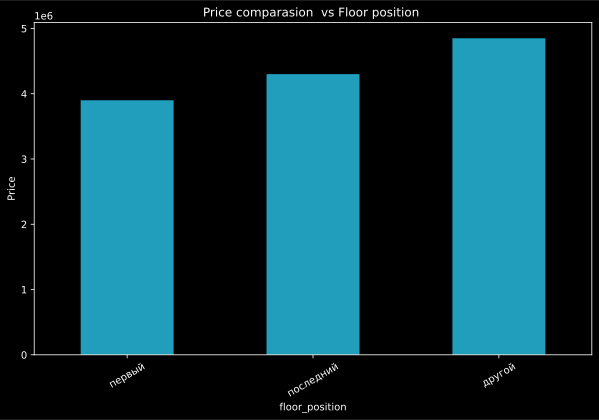

In [633]:
plt.style.use('dark_background')
axes.yaxis.set_major_formatter(ticker.EngFormatter())
grouped_data_median.plot.bar(rot = 30, color='#219ebc',title= "Price comparasion  vs Floor position ")
plt.ylabel("Price")
plt.show()


The apartments that are on the first or  last floor have a lower price . <br>

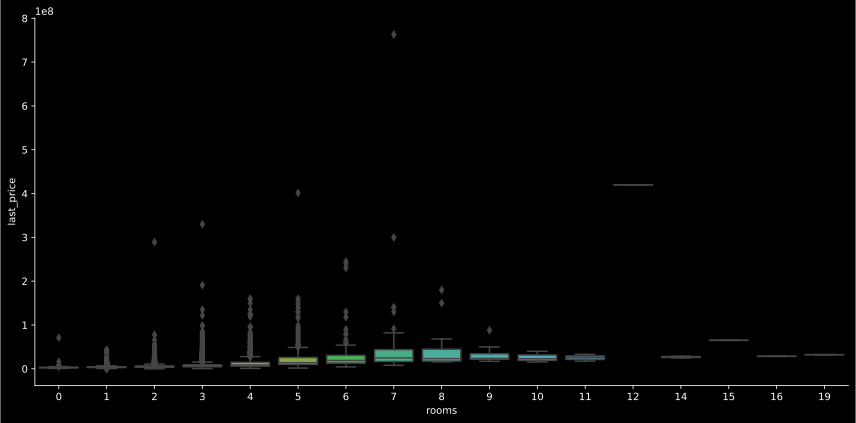

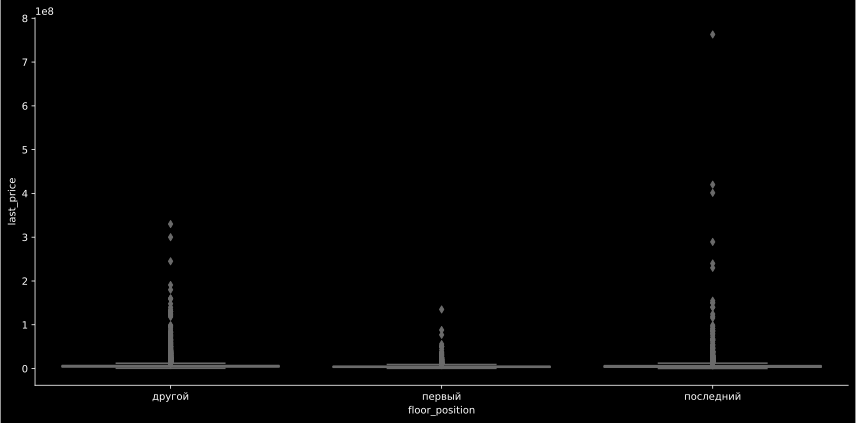

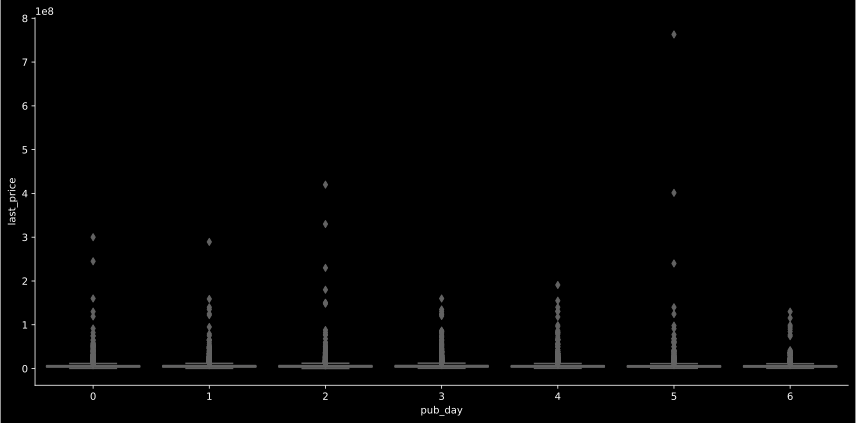

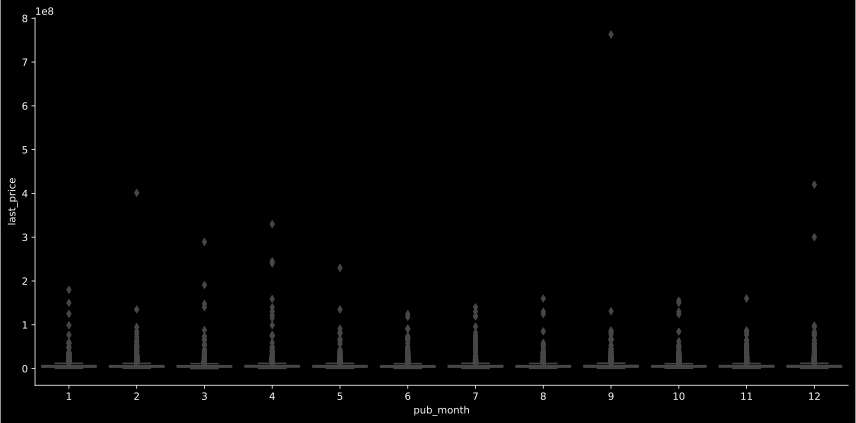

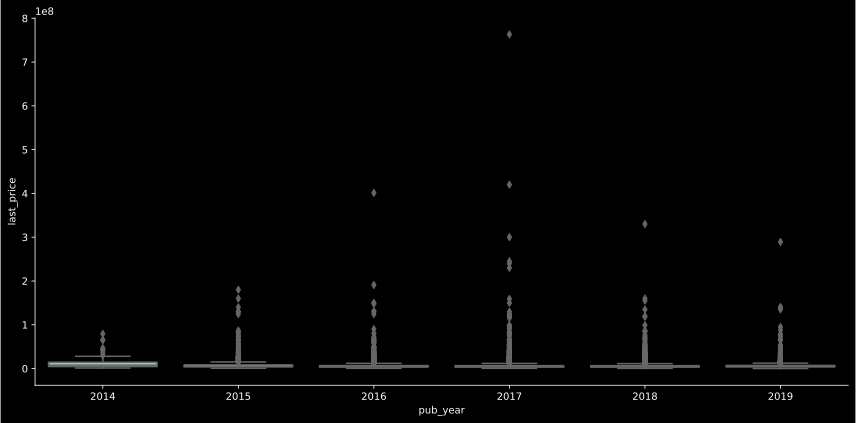

In [634]:
for column in ['rooms','floor_position','pub_day','pub_month','pub_year']:
    sns.catplot(x=column, y="last_price",height=6, aspect=12/6, kind='box',data=estate)

it seem difficult to visualize and a lot of  outlier . We reoganize our data.<br>

#### We start by writing utils functions

In [635]:
# function  to return the missing values percentages  of a features

def missingPercentage(feature):
    percent =  round((estate[feature].isnull().sum() / len(estate[feature])) * 100 ,2)
    return f"Feature {feature} has {percent} % missing values."

In [654]:
# function that receives the name of the feature as input and returns the boundaries of the "whiskers"
# https://chartio.com/learn/charts/box-plot-complete-guide/

def det_whiskers(column):
    stat = estate[column].describe()
    
    # interquartile range
    iqr = stat[6] - stat[4]

    # left_whiske   
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    # left "whisker" should not be less than the minimum value
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    # right "whisker" should not be greater than the maximum value
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

In [637]:
estate

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_meter_2,pub_day,pub_month,pub_year,floor_position,ratio_living_space,ratio_kitchen_space
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,<NA>,120370.37,3,3,2019,другой,47.22,23.15
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,True,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый,46.04,27.23
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,True,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой,61.25,14.82
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,34.46,9,True,False,False,124.54,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой,21.67,78.33
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой,32.00,41.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,True,False,False,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,<NA>,72490.85,1,3,2017,другой,54.78,10.34
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5,38.00,4,True,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,52542.37,0,1,2018,другой,64.41,14.41
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3,29.70,1,True,False,False,27.00,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,44091.71,6,2,2018,первый,52.38,47.62
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17,34.46,12,True,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602,149511.40,1,3,2017,другой,44.90,30.36


In [638]:
estate['unusual_price'] = (estate['last_price'] > det_whiskers('last_price')[1]) | (estate['last_price'] < det_whiskers('last_price')[0])

In [639]:
estate['unusual_area'] = (estate['total_area'] > det_whiskers('total_area')[1]) | (estate['total_area'] < det_whiskers('total_area')[0])


In [640]:
estate['unusual_rooms'] = (estate['rooms'] > det_whiskers('rooms')[1]) | (estate['rooms'] < det_whiskers('rooms')[0])

In [641]:
estate['unusual_ceiling'] = (estate['ceiling_height'] > det_whiskers('ceiling_height')[1]) | (estate['ceiling_height'] < det_whiskers('ceiling_height')[0])

In [642]:
estate['days_exposition'].median()

108.0

In [643]:
estate['unusual_day_expo'] = (estate['days_exposition'] > det_whiskers('days_exposition')[1]) | (estate['days_exposition'] < det_whiskers('days_exposition')[0])

In [644]:
good_data = estate.query('unusual_price == False and unusual_area == False and unusual_rooms == False and unusual_ceiling == False and unusual_day_expo == False',engine = 'python')


In [645]:
round(len(good_data)/len(estate),2) * 100 

67.0

In [646]:
# grouped = good_data.pivot_table(index='rooms', values = 'last_price',aggfunc='median').sort_values(by='last_price')

In [647]:
# sns.boxplot(x = 'rooms',y ='last_price' , data= good_data , order=grouped.index)

Reducing the influence of extreme values: Outliers can skew statistical analysis, such as the mean or standard deviation, making them less representative of the overall data. Removing these outliers can reduce the influence of extreme values on your analysis.

67% of our data will be used.

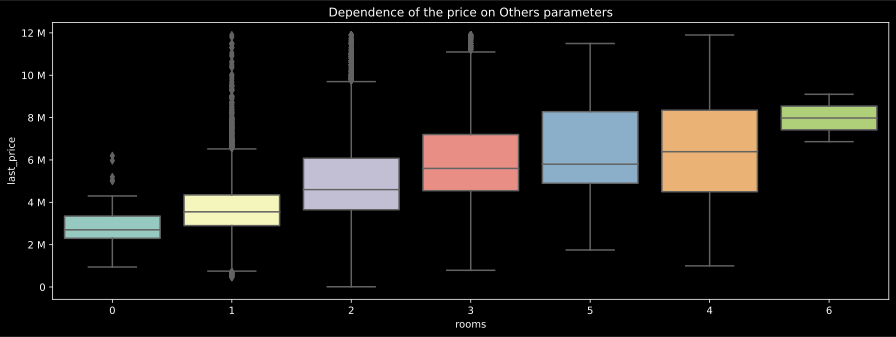

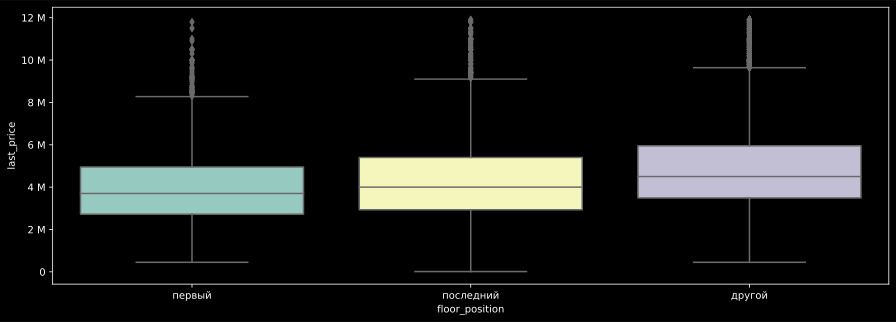

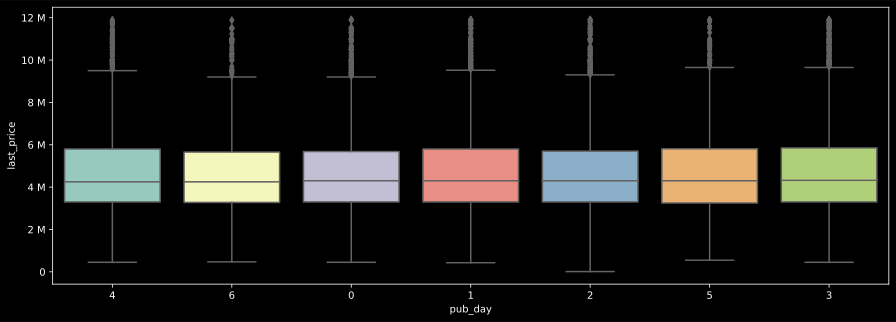

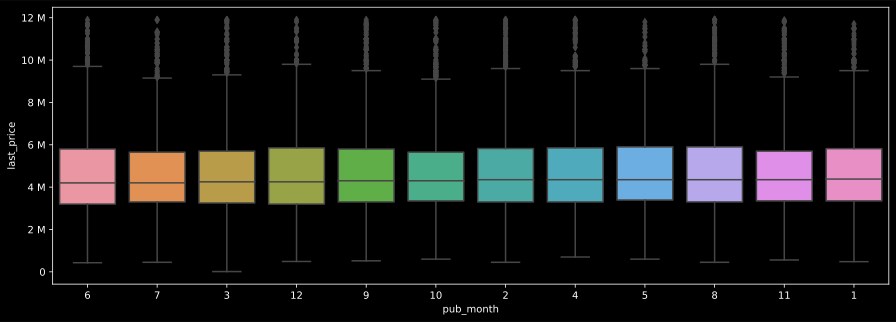

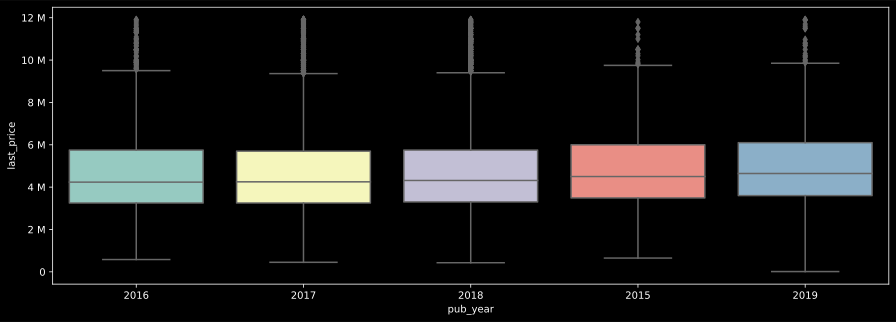

In [648]:
for column in ['rooms','floor_position','pub_day','pub_month','pub_year']:
    fig , axes = plt.subplots(figsize = (15,5))
    axes.yaxis.set_major_formatter(ticker.EngFormatter())
    grouped = good_data.pivot_table(index=column, values = 'last_price',aggfunc='median').sort_values(by='last_price')
    if (column == 'rooms'):
        sns.boxplot(x = column,y ='last_price' , data= good_data , order=grouped.index).set(title="Dependence of the price on Others parameters")
    else:
        sns.boxplot(x = column,y ='last_price' , data= good_data , order=grouped.index)
    plt.show()

Boxplot can better show comparaison  of last_price according to a parameter .<br>


### **4.4 Most  added location** <a name = "4.4"> </a>


In [649]:

most_added_location_index = good_data['locality_name'].value_counts().sort_values(ascending=False)[0:9].index.tolist()

In [650]:
most_added_location = round(good_data.pivot_table(index='locality_name',values='price_meter_2',aggfunc='mean'),2).loc[most_added_location_index]
most_added_location = most_added_location.sort_values(by='price_meter_2')
most_added_location 

,price_meter_2
locality_name,
Всеволожск,66521.90
Гатчина,67956.56
Колпино,74753.33
посёлок Шушары,78125.55
посёлок Мурино,85842.63
посёлок Парголово,89633.46
деревня Кудрово,92109.93
Пушкин,99186.08
Санкт-Петербург,104295.39


<AxesSubplot:ylabel='locality_name'>

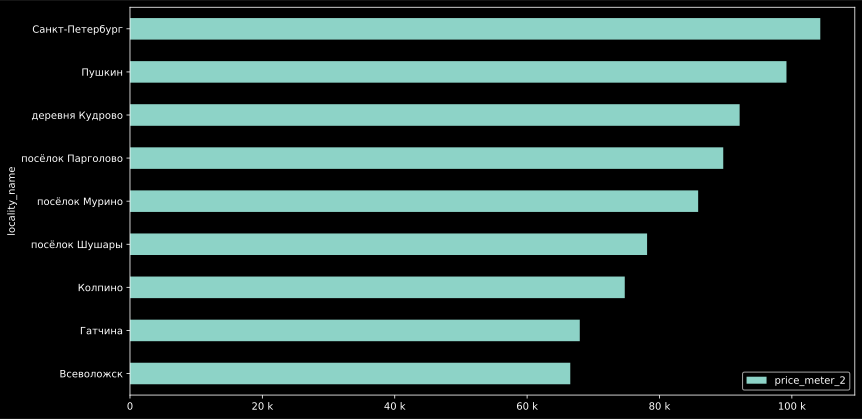

In [651]:
fig , axes = plt.subplots(figsize = (13,7))
axes.xaxis.set_major_formatter(ticker.EngFormatter())
most_added_location.plot(kind='barh', ax = axes)

**Санкт-Петербург** has highest price by meter while  **Всеволожск**  has lowest price.

### **4.5 'St Petersbourg'  case** <a name = "4.5"> </a>


In [652]:
good_data['cityCenters_nearest_kms'] = round(good_data['cityCenters_nearest']/1000,0)
st_peter = good_data[good_data['locality_name'] == 'Санкт-Петербург']
st_petergrouped = st_peter.pivot_table(index='cityCenters_nearest_kms', values='last_price')


<AxesSubplot:xlabel='cityCenters_nearest_kms'>

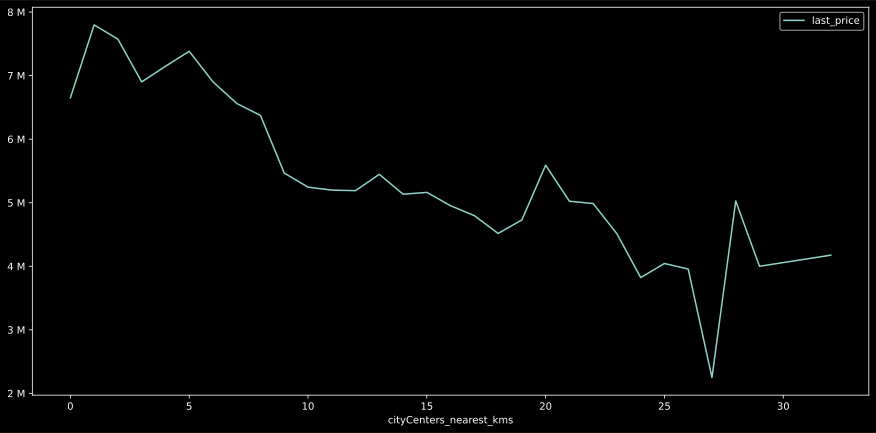

In [653]:
fig , axes = plt.subplots(figsize = (15,7))
axes.yaxis.set_major_formatter(ticker.EngFormatter())
st_petergrouped.plot( ax = axes)

The price decrease in general  when moving  away from the center . After **25km** ,the price increase . We can evaluate 0km to -> 25km as our bondary. 

## **CONCLUSION**<a name="5.0"> </a>

To determine the market value of real estate, the following parameters are important:<br>
  - total area of the apartment 
  - distance to the city center
  - number of rooms and floor of the apartmen
  - We need to put restriction in oour data to minimize mistake.
  - Control of data it too fast selling or too long selling state.